<a href="https://colab.research.google.com/github/yashnarkhede/AI-generate-Music-VIdeo/blob/main/Riffusion_%2B_Gradio_AI_Generated_Music_Video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Mon Dec 19 02:35:33 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   69C    P0    28W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# Install required Libraries 

In [2]:
!pip install -q https://github.com/camenduru/stable-diffusion-webui-colab/releases/download/0.0.15/xformers-0.0.15.dev0+189828c.d20221207-cp38-cp38-linux_x86_64.whl

     |████████████████████████████████| 102.9 MB 461 kB/s 


In [3]:
! pip install -U transformers diffusers gradio ftfy pydub -q 

     |████████████████████████████████| 5.8 MB 38.5 MB/s 
     |████████████████████████████████| 503 kB 71.8 MB/s 
     |████████████████████████████████| 13.8 MB 70.2 MB/s 
     |████████████████████████████████| 53 kB 56 kB/s 
     |████████████████████████████████| 7.6 MB 49.6 MB/s 
     |████████████████████████████████| 182 kB 76.7 MB/s 
     |████████████████████████████████| 84 kB 3.3 MB/s 
     |████████████████████████████████| 84 kB 3.6 MB/s 
     |████████████████████████████████| 106 kB 75.0 MB/s 
     |████████████████████████████████| 2.3 MB 49.4 MB/s 
     |████████████████████████████████| 55 kB 1.8 MB/s 
     |████████████████████████████████| 278 kB 77.6 MB/s 
     |████████████████████████████████| 56 kB 4.3 MB/s 
     |████████████████████████████████| 64 kB 3.0 MB/s 
     |████████████████████████████████| 80 kB 9.4 MB/s 
     |████████████████████████████████| 68 kB 6.9 MB/s 
     |████████████████████████████████| 58 kB 6.2 MB/s 
     |██████████████████████████

# Credit to riffusion team for the helper script to convert spectogram to audio

Credit: https://github.com/hmartiro/riffusion-inference

In [4]:
!wget https://raw.githubusercontent.com/hmartiro/riffusion-inference/main/riffusion/audio.py

--2022-12-19 02:36:33--  https://raw.githubusercontent.com/hmartiro/riffusion-inference/main/riffusion/audio.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4778 (4.7K) [text/plain]
Saving to: ‘audio.py’

audio.py            100%[===================>]   4.67K  --.-KB/s    in 0s      

2022-12-19 02:36:33 (64.5 MB/s) - ‘audio.py’ saved [4778/4778]



# Import all required Libraries 

In [5]:
import gradio as gr

import torch
from diffusers import StableDiffusionPipeline
from audio import wav_bytes_from_spectrogram_image


# Load the model from Hugging Face Model Hub

In [6]:
model_id = "riffusion/riffusion-model-v1"
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)

Downloading:   0%|          | 0.00/543 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

Downloading:   0%|          | 0.00/342 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.84k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/284 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/492M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/525k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/472 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/806 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/743 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/547 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/335M [00:00<?, ?B/s]

Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.


In [7]:
pipe = pipe.to("cuda")
pipe.enable_xformers_memory_efficient_attention()

# Create the core Audio Function

In [8]:
import random
COLORS = [
    ["#ff0000", "#00ff00"],
    ["#00ff00", "#0000ff"],
    ["#0000ff", "#ff0000"],
]    
        


In [9]:
from diffusers import StableDiffusionPipeline
import torch

img_model_id = "runwayml/stable-diffusion-v1-5"
img_pipe = StableDiffusionPipeline.from_pretrained(img_model_id, torch_dtype=torch.float16, revision="fp16")
img_pipe = img_pipe.to("cuda")
img_pipe.enable_xformers_memory_efficient_attention()



Downloading:   0%|          | 0.00/543 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

Downloading:   0%|          | 0.00/342 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.70k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/608M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/307 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/636 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/246M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/525k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/472 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/822 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/806 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.72G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/609 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/167M [00:00<?, ?B/s]

Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.


In [10]:
prompt = 'kid in the park' 

In [11]:
spectogram = pipe(prompt).images[0]
wav = wav_bytes_from_spectrogram_image(spectogram)
with open("output.wav", "wb") as f:
    f.write(wav[0].getbuffer())


  0%|          | 0/50 [00:00<?, ?it/s]

In [12]:
image = img_pipe(prompt + ", artstation hall of fame gallery, editors choice, #1 digital painting of all time, most beautiful image ever created, emotionally evocative, greatest art ever made, lifetime achievement magnum opus masterpiece, the most amazing breathtaking image with the deepest message ever painted, a thing of beauty beyond imagination or words").images[0]  

  0%|          | 0/50 [00:00<?, ?it/s]

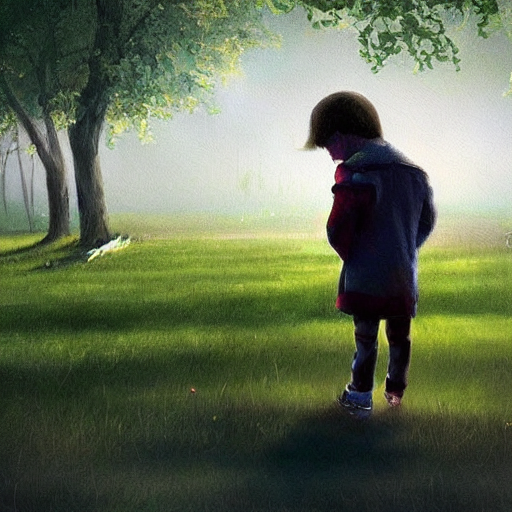

In [13]:
image

In [14]:
image.save("img.png")

In [15]:
video_path = gr.make_waveform('output.wav', bg_image='img.png', bars_color=random.choice(COLORS))

In [16]:
from IPython.display import HTML
from base64 import b64encode
 
def show_video(video_path, video_width = 600):
   
  video_file = open(video_path, "r+b").read()
 
  video_url = f"data:video/mp4;base64,{b64encode(video_file).decode()}"
  return HTML(f"""<video width={video_width} controls><source src="{video_url}"></video>""")
 
show_video(video_path)

In [17]:
def audio_gen(prompt):
    spectogram = pipe(prompt).images[0]
    wav = wav_bytes_from_spectrogram_image(spectogram)
    with open("output.wav", "wb") as f:
        f.write(wav[0].getbuffer())
    print("audio saved")
    print("img started")
    txt_prompt = prompt + ", artstation hall of fame gallery, editors choice, #1 digital painting of all time, most beautiful image ever created, emotionally evocative, greatest art ever made, lifetime achievement magnum opus masterpiece, the most amazing breathtaking image with the deepest message ever painted, a thing of beauty beyond imagination or words"
    image = img_pipe(txt_prompt).images[0] 
    image.save("img.png") 
    print("img saved")
    video = gr.make_waveform('output.wav', bg_image='img.png', bars_color=random.choice(COLORS))
    print("video done!")
    return ('output.wav',video)


In [18]:
audio_gen("lazy nights")

  0%|          | 0/50 [00:00<?, ?it/s]

audio saved
img started


  0%|          | 0/50 [00:00<?, ?it/s]

img saved
video done!


('output.wav', '/tmp/tmpn7mjei0a.mp4')

In [19]:
gr.Interface(
    audio_gen,
    inputs=[gr.Textbox(label="prompt")],
    outputs=[
        gr.Audio(type='filepath'),
        gr.Video(type='filepath')
    ],
    title = 'Riffusion + Stable Diffusion - AI generated Music Video'
).launch(debug = True,)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

  0%|          | 0/50 [00:00<?, ?it/s]

audio saved
img started


  0%|          | 0/50 [00:00<?, ?it/s]

img saved
video done!


  0%|          | 0/50 [00:00<?, ?it/s]

audio saved
img started


  0%|          | 0/50 [00:00<?, ?it/s]

img saved
video done!
Keyboard interruption in main thread... closing server.
